# Shortest Path

Networkx tiene una implementación que encuentra el camino más corto entre dos puntos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import pickle

Se utilizará los datos de tiempo.

In [3]:
time_data = pd.read_csv('time_matrix.csv')

Matriz de adyacencia para generar el grafo.

In [8]:
time_matrix = time_data.iloc[:,1:].values

In [9]:
time_graph = nx.DiGraph(time_matrix)

La función devuelve el nombre de los nodos que forman parte del camino más corto.

In [11]:
nx.shortest_path(time_graph,15,11)

[15, 10, 14, 0, 29, 32, 2, 22, 11]

Para la demostración gráfica se necesita el modelo de osmnx.

In [12]:
with open('cluster_model.pickle', 'rb') as handle:
    graph = pickle.load(handle)

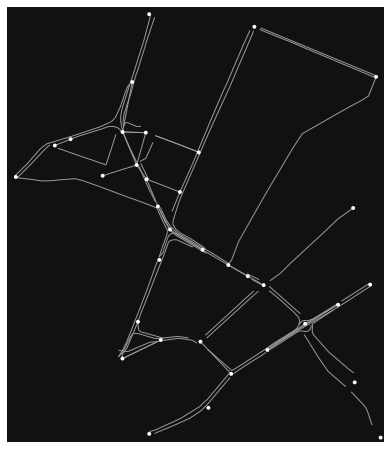

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [13]:
ox.plot_graph(graph)

Se puede cambiar el color de los nodos para poder visualizar el camino.

In [31]:
colors = ['b']*35

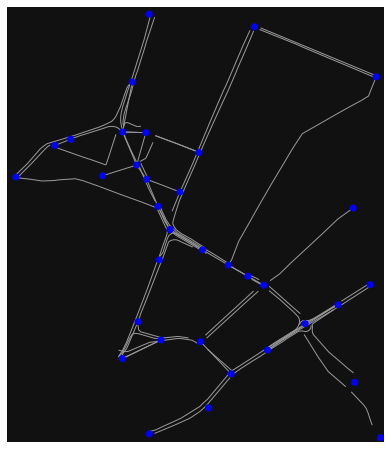

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [32]:
ox.plot_graph(graph,
            node_size=50,
            node_color = colors)

Los nodos del path se pueden cambiar de color, pero sigue siendo difícil ver el path.

In [208]:
def find_shortest_path(node1,node2):
    path = nx.shortest_path(time_graph,node1,node2)
    colors = ['b']*35
    for node in (path):
        colors[node] = 'y'
    colors[node1] = 'g'
    colors[node2] = 'r'
    ox.plot_graph(graph,
            node_size=50,
            node_color = colors)

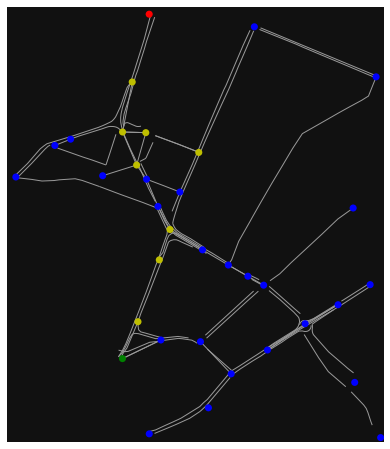

In [209]:
find_shortest_path(11,15)

Eliminar las calles que no conectan con el path hará que el mapa se vuelva imposible de visualizarse.

In [210]:
path = nx.shortest_path(time_graph,11,15)
#copia del grafo original
new_graph = graph.copy()
#eliminar las edges
for edge in graph.edges:
    if(edge[0] not in path or edge[1] not in path):
        new_graph.remove_edge(edge[0],edge[1])

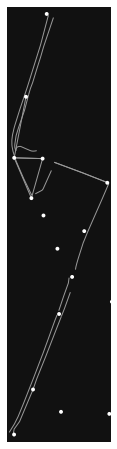

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [211]:
ox.plot_graph(new_graph)

La mejor opción es imprimir el mapa junto a un grafo dirigido para entender la dirección del movimiento.

In [200]:
with open('coordenadas_centros.pickle', 'rb') as handle:
    pos = pickle.load(handle)

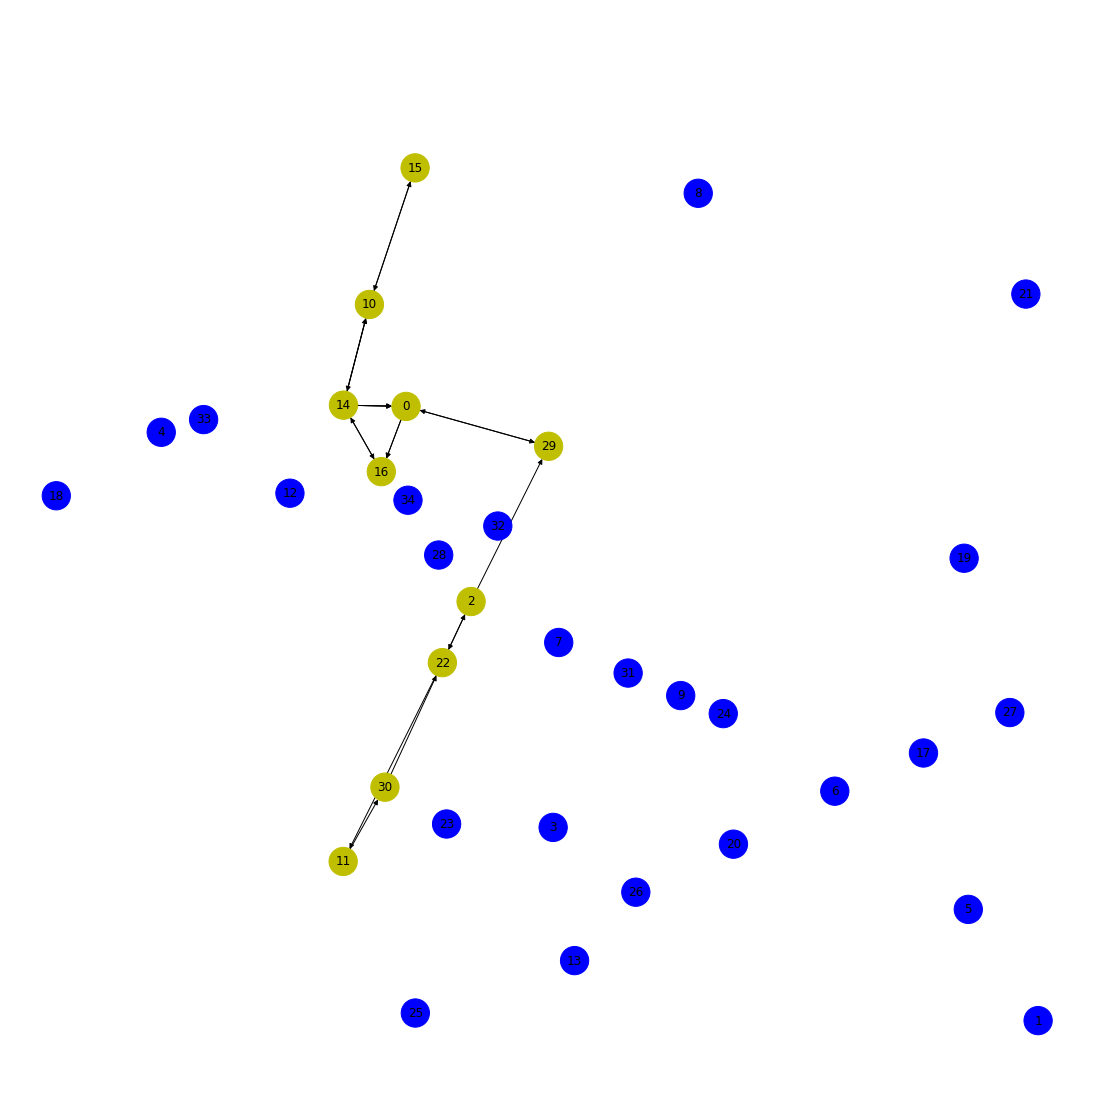

In [216]:
colors = ['b']*35

for node in (path):
    colors[node] = 'y'
new_graph = graph.copy()
    
for edge in graph.edges:
    if(edge[0] not in path or edge[1] not in path):
        new_graph.remove_edge(edge[0],edge[1])
        
plt.figure(figsize=(15,15))
nx.draw(new_graph,pos,
            node_size=800,
            with_labels = True,
            node_color = colors)